# Comparing Ecker Data using Particle Size Distribution Basic DFN

Try and implement basic DFN with variable particle sizes

In [1]:
%pip install pybamm -q    # install PyBaMM if it is not installed
import pybamm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Note: you may need to restart the kernel to use updated packages.


In [2]:
chemistry = pybamm.parameter_sets.Ecker2015
var = pybamm.standard_spatial_vars

In [3]:
# load ecker data
voltage_data_1C = pd.read_csv("pybamm/input/discharge_data/Ecker_1C.csv", header=None).to_numpy()
voltage_data_5C = pd.read_csv("pybamm/input/discharge_data/Ecker_5C.csv", header=None).to_numpy()

import relevant class

In [4]:
os.chdir("pybamm/models/full_battery_models/lithium_ion")
from basic_dfn_multiple_particle import BasicMPMDFN
os.chdir(pybamm.__path__[0]+'/..')

specify particle distribution and build model

In [5]:
specs = np.array([(1,1/3),(2,1/3),(3,1/3)]), np.array([(6.5e-06,1)])
#specs = np.array([(1.37e-05,1)]), np.array([(6.5e-06,1)])

In [6]:
model1 = BasicMPMDFN(specs)
model2 = pybamm.lithium_ion.BasicDFN()
model3 = pybamm.lithium_ion. DFN()

In [7]:
parameter_values1 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values1.update({"Current function [A]": "[input]"})

In [8]:
parameter_values2 = pybamm.ParameterValues(chemistry=chemistry)
parameter_values2.update({"Current function [A]": "[input]"})

In [9]:
var_pts1 = {
    var.x_n: int(parameter_values1.evaluate(model2.param.L_n / 1e-6)),
    var.x_s: int(parameter_values1.evaluate(model2.param.L_s / 1e-6)),
    var.x_p: int(parameter_values1.evaluate(model2.param.L_p / 1e-6)),
    var.r_n: int(parameter_values1.evaluate(model2.param.R_n / 1e-7)),
    var.r_p: int(parameter_values1.evaluate(model2.param.R_p / 1e-7)),
}
var_pts2 = {
    var.x_n: int(parameter_values1.evaluate(model3.param.L_n / 1e-6)),
    var.x_s: int(parameter_values1.evaluate(model3.param.L_s / 1e-6)),
    var.x_p: int(parameter_values1.evaluate(model3.param.L_p / 1e-6)),
    var.r_n: int(parameter_values1.evaluate(model3.param.R_n / 1e-7)),
    var.r_p: int(parameter_values1.evaluate(model3.param.R_p / 1e-7)),
}

In [10]:
sim1 =  pybamm.Simulation(model1, parameter_values=parameter_values2, var_pts=var_pts1)
sim2 =  pybamm.Simulation(model2, parameter_values=parameter_values1, var_pts=var_pts1)
sim3 = pybamm.Simulation(model3, parameter_values=parameter_values1, var_pts=var_pts2)

In [11]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values1["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions1 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim1.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions1[i] = sim1.solution

In [12]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values1["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions2 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim2.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions2[i] = sim2.solution

In [13]:
C_rates = [1, 5]  # C-rates to solve for
capacity = parameter_values1["Cell capacity [A.h]"]
t_evals = [
    np.linspace(0, 3800, 100), 
    np.linspace(0, 720, 100)
] # times to return the solution at
solutions3 = [None] * len(C_rates)  # empty list that will hold solutions

# loop over C-rates
for i, C_rate in enumerate(C_rates):
    current = C_rate * capacity
    sim3.solve(t_eval=t_evals[i], solver=pybamm.CasadiSolver(mode="fast"),inputs={"Current function [A]": current})
    solutions3[i] = sim3.solution

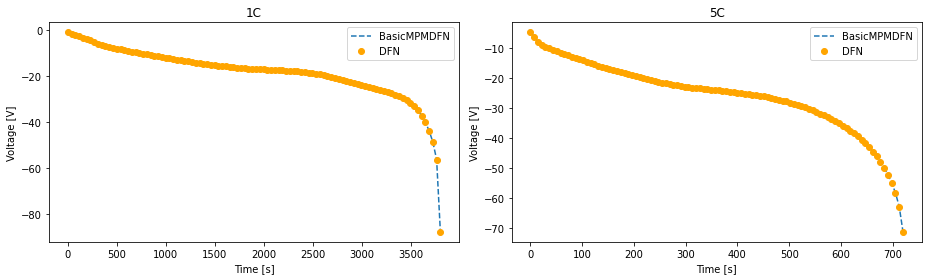

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# plot the 1C results
t_sol1 = t_evals[0]
t_sol2 = t_evals[0]
t_sol3 = solutions3[0]["Time [s]"].entries
ax1.plot(t_sol1, solutions1[0]["Terminal voltage"](t_sol1), linestyle='--', label="BasicMPMDFN")
#ax1.plot(t_sol2, solutions2[0]["Terminal voltage"](t_sol2), color='green', label='BasicDFN')
ax1.plot(t_sol3, solutions3[0]["Terminal voltage"](t_sol3), "o", color='orange', label='DFN')
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Voltage [V]")
ax1.set_title("1C")
ax1.legend(loc="best")

# plot the 5C results
t_sol1 = t_evals[1]
t_sol2 = t_evals[1]
t_sol3 = solutions3[1]["Time [s]"].entries
ax2.plot(t_sol1, solutions1[1]["Terminal voltage"](t_sol1), linestyle='--', label="BasicMPMDFN")
#ax2.plot(t_sol2, solutions2[1]["Terminal voltage"](t_sol2), color='green', label='BasicDFN')
ax2.plot(t_sol3, solutions3[1]["Terminal voltage"](t_sol3), "o", color='orange', label='DFN')
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Voltage [V]")
ax2.set_title("5C")
ax2.legend(loc="best")

plt.tight_layout()
plt.show()